In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [133]:
data = pd.read_csv("framingham.csv")

In [134]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [135]:
data = data.drop(columns = ['totChol','sysBP','diaBP', 'BMI','heartRate','glucose'] , axis=1)

In [136]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,0


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   TenYearCHD       4238 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 331.2 KB


In [138]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [152]:
data.nunique()

male                2
age                39
education           4
currentSmoker       2
cigsPerDay         33
BPMeds              2
prevalentStroke     2
prevalentHyp        2
diabetes            2
TenYearCHD          2
dtype: int64

In [153]:
data.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
TenYearCHD           int64
dtype: object

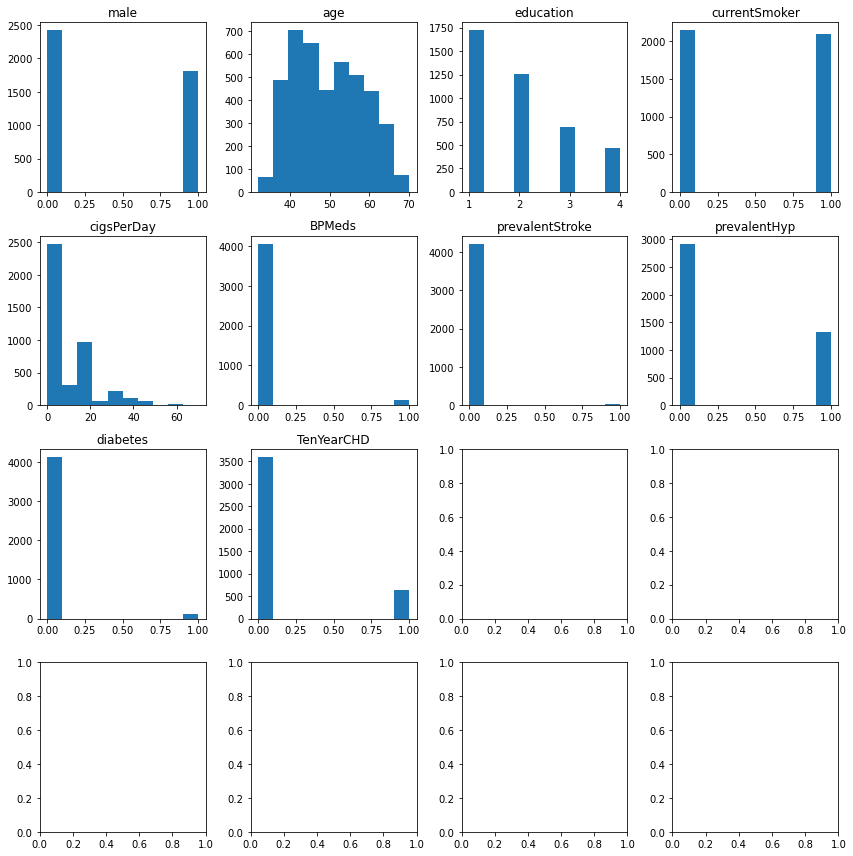

In [139]:

# Créer une figure et des axes
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))
# Parcourir les colonnes du dataframe et tracer les histogrammes
for i, column in enumerate(data.columns):
    row = i // 4  # Calculer le numéro de ligne
    col = i % 4   # Calculer le numéro de colonne
    # Tracer l'histogramme sur l'axe correspondant
    axes[row, col].hist(data[column], bins=10)
    axes[row, col].set_title(column)  # Définir le titre de l'axe
# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
# Afficher le graphique
plt.show()


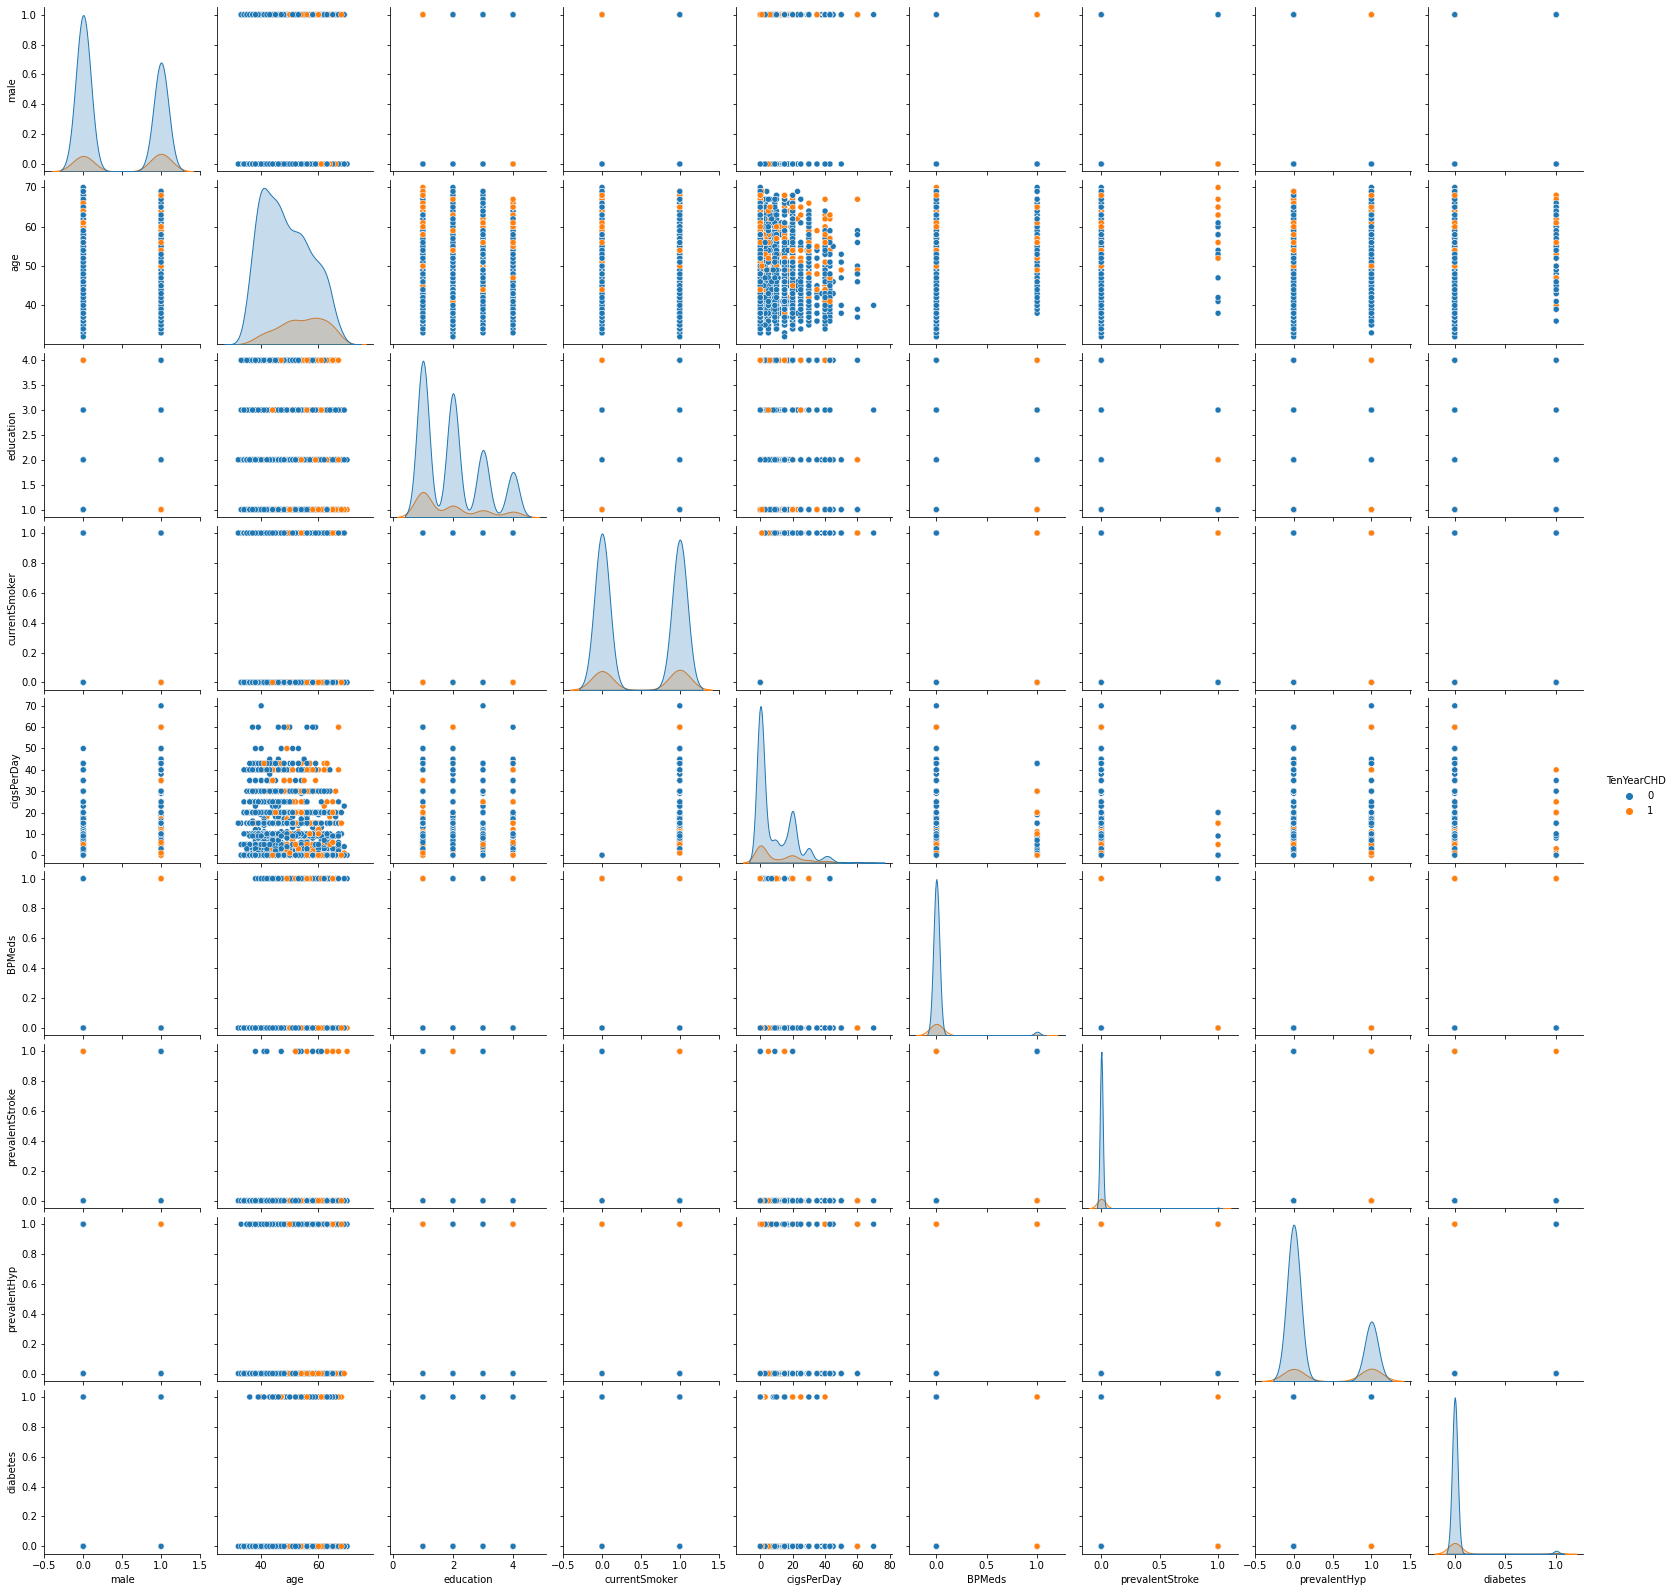

In [154]:
import seaborn as sns
sns.pairplot(data, hue='TenYearCHD')
plt.show()

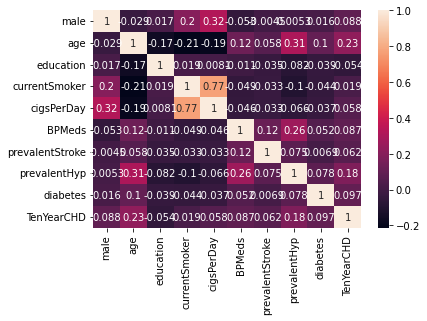

In [155]:
plt.figure()
sns.heatmap(data.corr(),annot=True)
plt.show()

In [140]:
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
TenYearCHD           0
dtype: int64

In [141]:
data.head(1)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,0


In [142]:
x = data.drop(['TenYearCHD'], axis = 1)
y = data['TenYearCHD']

In [143]:
from sklearn.impute import SimpleImputer
# Create an instance of SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if desired
imputer.fit(X[:,2:3])
X[:,2:3]= imputer.transform(X[:,2:3])

In [144]:
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if desired
imputer.fit(X[:,4:6])
X[:,4:6]= imputer.transform(X[:,4:6])

# Using ScikitLearn 

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [146]:
from sklearn.linear_model import LogisticRegression

In [147]:
clf = LogisticRegression(random_state=0 , max_iter=1000).fit(X_train, y_train)

In [148]:
y_pred=clf.predict(X_test)

In [151]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       710
           1       0.67      0.01      0.03       138

    accuracy                           0.84       848
   macro avg       0.75      0.51      0.47       848
weighted avg       0.81      0.84      0.77       848



# From scratch 

In [156]:
# La fonction sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [168]:
def predict(X, weights, bias):
    logits = np.dot(X, weights) + bias
    probabilities = sigmoid(logits)
    predictions = np.round(probabilities).astype(int)
    return predictions


In [167]:
def train(X, y, learning_rate, num_iterations):
    # Initialiser les poids et le biais à zéro
    num_samples, num_features = X.shape
    weights = np.zeros(num_features)
    bias = 0

    for i in range(num_iterations):
        # Calculer les logits et les probabilités
        logits = np.dot(X, weights) + bias
        probabilities = sigmoid(logits)

        # Calculer le gradient
        dw = (1 / num_samples) * np.dot(X.T, (probabilities - y))
        db = (1 / num_samples) * np.sum(probabilities - y)

        # Mettre à jour les poids et le biais
        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias

In [169]:
# Entraîner le modèle
learning_rate = 0.01
num_iterations = 1000
weights, bias = train(X_train, y_train, learning_rate, num_iterations)
# Faire des prédictions sur l'ensemble de test
y_pred = predict(X_test, weights, bias)

In [170]:
# Calculer l'exactitude des prédictions
accuracy = accuracy_score(y_test, y_pred)
print("Exactitude : {:.2f}%".format(accuracy * 100))

Exactitude : 83.73%
